# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [196]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [271]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

hospital_read_df.rename(columns ={'Hospital Name': 'Hospital',
                                  'Provider Number': 'Provider',
                                  'Measure Name': 'Measure',
                                  'Number of Discharges': 'Discharges',
                                  'Excess Readmission Ratio': 'Readmission_Ratio',
                                  'Predicted Readmission Rate': 'Predicted_Rate',
                                  'Expected Readmission Rate': 'Expected_Rate',
                                  'Number of Readmissions': 'Count',
                                  'Start Date': 'Start_Date',
                                  'End Date': 'End_Date'}, inplace =True)

In [272]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital             16860 non-null object
Provider             16860 non-null int64
State                16860 non-null object
Measure              16860 non-null object
Discharges           16860 non-null object
Footnote             3129 non-null float64
Readmission_Ratio    13731 non-null float64
Predicted_Rate       13731 non-null float64
Expected_Rate        13731 non-null float64
Count                11497 non-null float64
Start_Date           16860 non-null object
End_Date             16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [280]:
hospital_read_df.head(5)

,Hospital,Provider,State,Measure,Discharges,Footnote,Readmission_Ratio,Predicted_Rate,Expected_Rate,Count,Start_Date,End_Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [281]:
# deal with missing and inconvenient portions of data
df = hospital_read_df.copy()

clean_hospital_read_df = df[df['Discharges'] != 'Not Available']
clean_hospital_read_df["Discharges"] = clean_hospital_read_df["Discharges"].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Discharges')

/Users/subhabratamukherjee/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


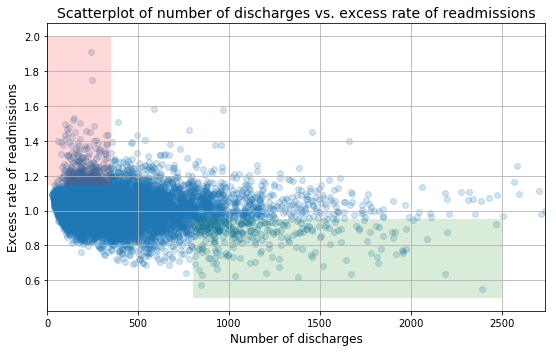

In [282]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Discharges'][81:-3]]
y = list(clean_hospital_read_df['Readmission_Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [283]:
# Your turn
clean_hospital_read_df['Readmission_Ratio'] = clean_hospital_read_df['Readmission_Ratio'].fillna(0)
df = clean_hospital_read_df[clean_hospital_read_df['Readmission_Ratio'] != 0]

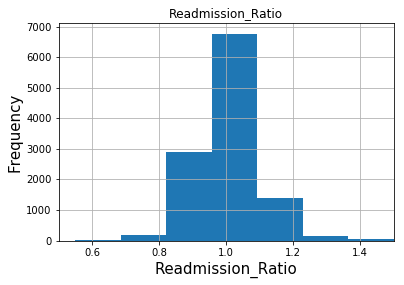

In [284]:
fig=plt.figure(figsize=(17,10))
df.hist(column="Readmission_Ratio")
plt.xlabel("Readmission_Ratio",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0.5,1.5])
plt.show()

In [328]:
dfDiscgt1000 = df[df["Discharges"] > 1000][["Discharges","Readmission_Ratio"]]
dfDisclt100 = df[df["Discharges"] < 100][["Discharges","Readmission_Ratio"]]

cntDiscgt1000 = dfDiscgt1000.Readmission_Ratio.count()
cntDisclt100 = dfDisclt100.Readmission_Ratio.count()

cntReadmissiongt1 = dfDiscgt1000[dfDiscgt1000['Readmission_Ratio'] > 1]['Readmission_Ratio'].count()
cntReadmissionlt1 = dfDisclt100[dfDisclt100['Readmission_Ratio'] > 1]['Readmission_Ratio'].count()

perReadmissiongt1 = (cntReadmissiongt1/cntDiscgt1000)*100
perReadmissionlt1 = (cntReadmissionlt1/cntDisclt100)*100

meanReadmission_Ratiogt1000 = dfDiscgt1000.Readmission_Ratio.mean()
meanReadmission_Ratiolt1 = dfDisclt100.Readmission_Ratio.mean()

print('In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is %s and %s%% have excess readmission rate greater than 1'%(round(meanReadmission_Ratiogt1000,2), round(perReadmissiongt1,0)))

print('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is %s and %s%% have excess readmission rate greater than 1'%(round(meanReadmission_Ratiolt1,2), round(perReadmissionlt1,0)))

In hospitals/facilities with number of discharges > 100, mean excess readmission rate is 0.98 and 44.0% have excess readmission rate greater than 1
In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.02 and 63.0% have excess readmission rate greater than 1


Lets verify if the mean excess readmission rate is having any influence on the number of discharges. Hence we construct our Hypothesis as follows

###### NULL HYPOTHESIS:
The mean excess readmission rate for the hospitals/facilities with number of discharges < 100 is same as the mean excess readmission rate for the hospitals/facilities with number of discharges > 1000

##### ALTERNATE HYPOTHESIS:
The mean excess readmission rate for the hospitals/facilities with number of discharges < 100 is not same as the mean excess readmission rate for the hospitals/facilities with number of discharges > 1000

Let us draw 2 sample of size 200 from each dataset.

In [334]:
dftest1 = dfDiscgt1000.take(np.random.permutation(len(dfDiscgt1000))[:200])
dftest2 = dfDisclt100.take(np.random.permutation(len(dfDisclt100))[:200])

#### Since the sample size is > 30, it can be considered as large sample

In [291]:
print(df[['Readmission_Ratio','Discharges']].corr())

                   Readmission_Ratio  Discharges
Readmission_Ratio           1.000000   -0.097398
Discharges                 -0.097398    1.000000


#### Since the correlation coefficient between Number of Discharges and Excess Readmission Ratio is very less we can assume the data is independant.

In [336]:
mn1 = round(dftest1.Readmission_Ratio.mean(),2)
sd1 = round(dftest1.Readmission_Ratio.std(),2)
mn2 = round(dftest2.Readmission_Ratio.mean(),2)
sd2 = round(dftest2.Readmission_Ratio.std(),2)

print('Mean Excess Readmission Ratio for %s records with Number of Discharges > 1000.'%(mn1))
print('Mean Excess Readmission Ratio for %s records with Number of Discharges < 1000.'%(mn2))

Mean Excess Readmission Ratio for 0.96 records with Number of Discharges > 1000.
Mean Excess Readmission Ratio for 1.02 records with Number of Discharges < 1000.


In [339]:
zstat, pval = ztest(x1=dftest1.Readmission_Ratio, x2=dftest2.Readmission_Ratio, value=mn2-mn1, alternative='two-sided', usevar='pooled', ddof=1.0)

print("The test result shows the test z-statistic as %s and the and P-value as %s" %(zstat, pval)) 

The test result shows the test z-statistic as -12.8069375737 and the and P-value as 1.49936007991e-37


In [350]:
print("With this P-value, %s < 0.01,there is strong evidence against Null hypothesis. \nHence we can conclude that there is strong evidence of mean excess readmission rate for the hospitals/facilities with number of discharges < 100 is not same as the mean excess readmission rate for the hospitals/facilities with number of discharges > 1000."%(pval))

With this P-value, 1.49936007991e-37 < 0.01,there is strong evidence against Null hypothesis. 
Hence we can conclude that there is strong evidence of mean excess readmission rate for the hospitals/facilities with number of discharges < 100 is not same as the mean excess readmission rate for the hospitals/facilities with number of discharges > 1000.


In [ ]:
Since the scatterplot is not showing the outliers, let;s

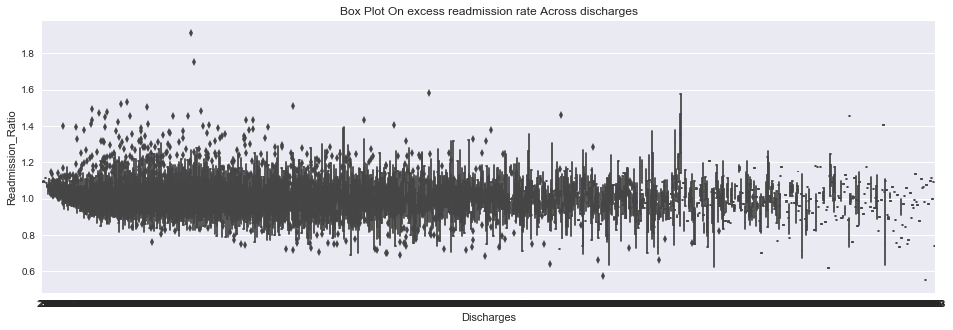

In [353]:
import seaborn as sns

fig, axes = plt.subplots()
fig.set_size_inches(16, 5)

sns.boxplot(data=df,y="Readmission_Ratio",x="Discharges",orient="v",ax=axes)

axes.set(xlabel='Discharges', ylabel='Readmission_Ratio',title="Box Plot On excess readmission rate Across discharges")

plt.show()